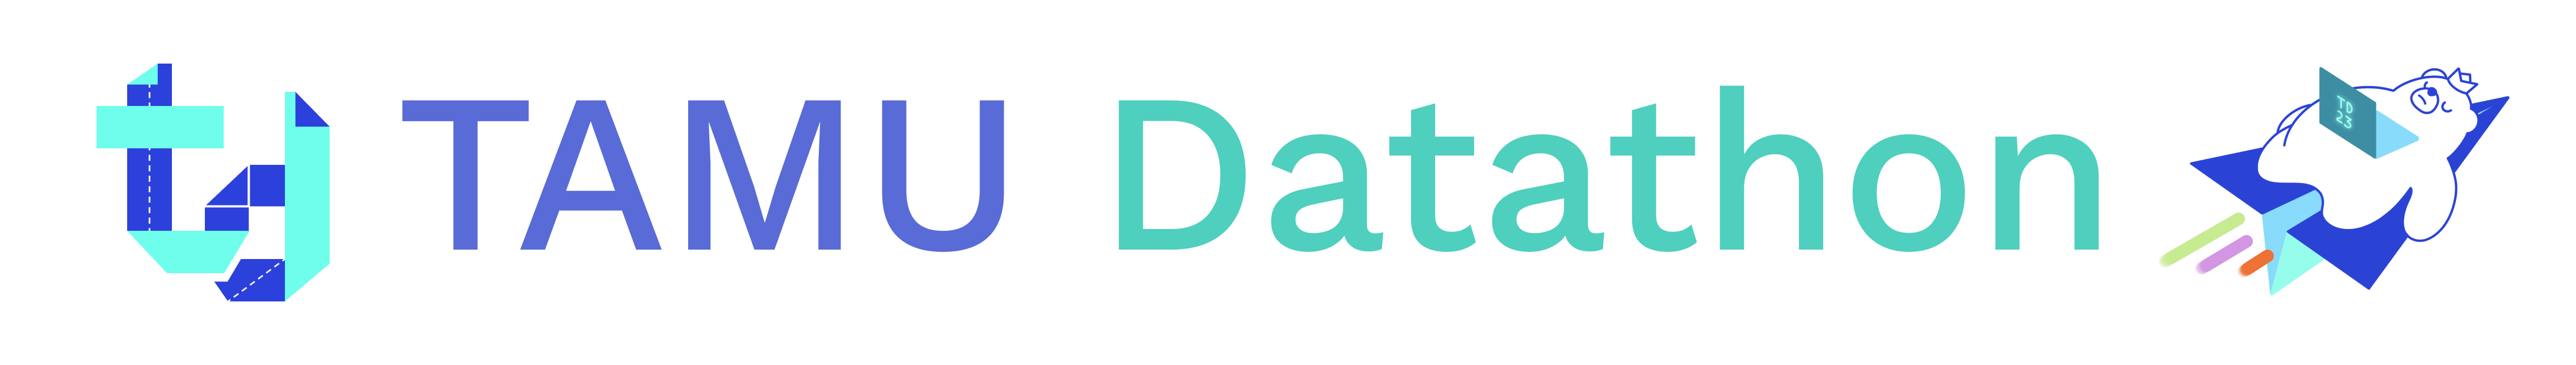


# TAMU Datathon 2023 - Intro to NLP
Presented by Abby Xu

Colab link: https://colab.research.google.com/drive/1PcevpYano1D20apglGx1JiQeUgmqNz8C?usp=sharing

### What is Natural Language Processing?
A field of study combining DS/ML and human language.
The ability of a computer program to understand human language as it is spoken and written

### What are the applications of NLP?
Stopping spam emails, identifying fake news, creating chat bots, translate text, spell check, auto complete and more!

### What will we cover today?
- Text preprocessing
- Feature engineering
- Classification

#### Python packages we will use:
- NLTK
- scikit-learn

- seaborn (plot the data)
- re (regular expression operations)


# Install Dependencies

In [12]:
##### download required packages #####
import re
import nltk
import seaborn as sns

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('gutenberg')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [13]:
# ---- The Zen of Python ---- #
import this

# Intro: string in **Python**

## String Type

In [ ]:
new_str1 = 'This is a String' # initialize a string with the variable named new_str1
new_str2 = "This is another String" # stonring another string to the variable new_Str2

print('ID of str1:', id(new_str1))  # shows the object identifier (address)
print('Type of str1:', type(new_str1))  # shows the object type
print('Value of str1:', new_str1)  # shows the object value
print()
print('Value of str2:', new_str2)

## Multi-line String

In [7]:
multi_line_str = """This is
a multi-line
string?"""

print(multi_line_str)
print()
multi_line_str #'This is\na multi-line\nstring?'

This is
a multi-line
string?



'This is\na multi-line\nstring?'

## String Indexing and Slicing

In [6]:
# index
str1 = 'abcdef'

print(len(str1))  # get the length of the str

for index, char in enumerate(str1):
    print(f'char {char} is at {index}')

6
char a is at 0
char b is at 1
char c is at 2
char d is at 3
char e is at 4
char f is at 5


In [ ]:
# slice
str1 = 'abcdef'

print(str1[2])    # the third
print(str1[-2])   # the last second
print(str1[2:])   # starting from third to the end
print(str1[:2])   # all elements until the third (not include the third)
print(str1[2:-2]) # from the third to the one before last second

In [7]:
# slicing with offsets
str1 = 'abcdef'

print(str1[::1]) # no offset
print(str1[::2]) # print every 2nd char in str1

abcdef
ace


In [3]:
# reverse
str1 = 'banana'
print(str1[::-1])

# palindrome - reads the same backwards as forwards
str2 = 'noon'
print(str2[::-1])

ananab
noon


## String Operation

In [ ]:
# add
str1 = 'I want '
str2 = 'an apple'
str3 = 'an orange'

print(str1+str2)
print(str1+str3)

In [5]:
# substring check
str1 = 'I want an apple'

print('apple' in str1)
print('banana' not in str1)

True
True


In [11]:
# case conversions
str1 = 'do you like apples?'

print(str1.capitalize())
print(str1.upper())
print(str1.title())
print()

# string replace
print(str1.replace('apples','bananas'))

Do you like apples?
DO YOU LIKE APPLES?
Do You Like Apples?
do you like bananas?


In [ ]:
# splitting and joining
str1 = 'I,am,a,comma,separated,string'

print(str1.split(','))
print(' '.join(str1.split(',')))

In [ ]:
# example
sentences = 'I love Python. I love NLP, too.'

print(sentences.split('.'))
print('\n'.join(sentences.split('.')))

In [13]:
# practice
sentences = 'I love Python. I love NLP, too.'
print('\n'.join([sentence.strip()
                     for sentence in sentences.split('.')
                         if sentence]))

I love Python
I love NLP, too


# Practice: putting it all together
Basic Text Processing and Analysis

## Get data & pre-processing

In [40]:
bible = gutenberg.open('bible-kjv.txt')
bible = bible.readlines()

bible[:5] # first five lines

['[The King James Bible]\n',
 '\n',
 'The Old Testament of the King James Bible\n',
 '\n',
 'The First Book of Moses:  Called Genesis\n']

In [6]:
# test - strip the '\n' in the list for the first five lines
[item.strip('\n') for item in bible[:5]]

['[The King James Bible]',
 '',
 'The Old Testament of the King James Bible',
 '',
 'The First Book of Moses:  Called Genesis']

In [41]:
bible = list(filter(None, [item.strip('\n') for item in bible]))
bible[:5] # first five lines of the result

['[The King James Bible]',
 'The Old Testament of the King James Bible',
 'The First Book of Moses:  Called Genesis',
 '1:1 In the beginning God created the heaven and the earth.',
 '1:2 And the earth was without form, and void; and darkness was upon']

## The distribution of the data

<ipython-input-8-41ff14f1dac6>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  p = sns.kdeplot(line_lengths, shade=True, color='blue')


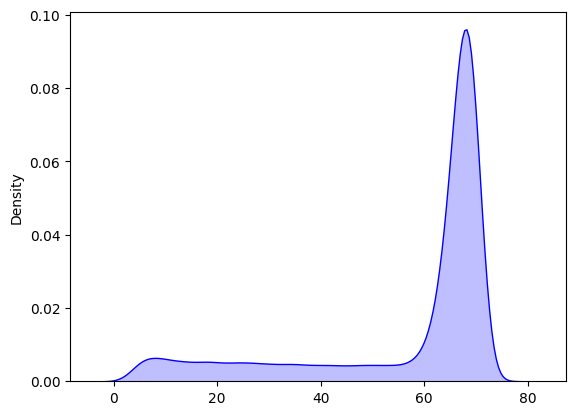

In [8]:
# the distribution of sentence lengths in the Bible

line_lengths = [len(sentence) for sentence in bible]
p = sns.kdeplot(line_lengths, shade=True, color='blue')

**NLP Concept - Tokenization**

Tokenization is used in NLP to split paragraphs and sentences into smaller units.

E.g. breaking the data into understandable parts such as the words.

In [14]:
# splitting each sentence to get words
tokens = [item.split() for item in bible]
# print(tokens[:5])

#***** Your Turn *****#
# plot the distribution of the sentence word counts across the Bible

## count the tokens per line(sentence)

## plot the data using sns.kdeplot() function


[['[The', 'King', 'James', 'Bible]'], ['The', 'Old', 'Testament', 'of', 'the', 'King', 'James', 'Bible'], ['The', 'First', 'Book', 'of', 'Moses:', 'Called', 'Genesis'], ['1:1', 'In', 'the', 'beginning', 'God', 'created', 'the', 'heaven', 'and', 'the', 'earth.'], ['1:2', 'And', 'the', 'earth', 'was', 'without', 'form,', 'and', 'void;', 'and', 'darkness', 'was', 'upon']]


## Data processing

### Flattening a list of lists
convert the list of tokenized sentences into one big flat list of tokens

In [42]:
# flattening the sublists in list
words = [word for sentence in tokens for word in sentence]
print(words[:20])

['[The', 'King', 'James', 'Bible]', 'The', 'Old', 'Testament', 'of', 'the', 'King', 'James', 'Bible', 'The', 'First', 'Book', 'of', 'Moses:', 'Called', 'Genesis', '1:1']


In [43]:
# removing special characters
words = list(filter(None, [re.sub(r'[^A-Za-z]', '', word) for word in words]))
print(words[:20])

['The', 'King', 'James', 'Bible', 'The', 'Old', 'Testament', 'of', 'the', 'King', 'James', 'Bible', 'The', 'First', 'Book', 'of', 'Moses', 'Called', 'Genesis', 'In']


### Common words?

In [44]:
from collections import Counter

# finding the common words
words = [word.lower() for word in words]
cnt = Counter(words)
cnt.most_common(10) # list top 10 common words in the Bible

[('the', 64023),
 ('and', 51696),
 ('of', 34670),
 ('to', 13580),
 ('that', 12912),
 ('in', 12667),
 ('he', 10419),
 ('shall', 9838),
 ('unto', 8997),
 ('for', 8970)]

**NLP Concept - Stop Words**

Stop words are a set of commonly used words in a language. Stop words are used in NLP to eliminate words that are so widely used that they don't carry much information.

E.g. 'a', 'the', 'is', 'are' etc.

In [35]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [47]:
# remove stopwords in the Bible

# words = [word.lower() for word in words if word not in stopwords]

'''
# same thing as:

for word in words:
    if word in stopwords:
        words.delete(word)
'''

c = Counter(words)
c.most_common(10)

[('shall', 9838),
 ('unto', 8997),
 ('lord', 7830),
 ('thou', 5474),
 ('thy', 4600),
 ('god', 4442),
 ('said', 3999),
 ('ye', 3983),
 ('thee', 3826),
 ('upon', 2748)]

# Break

# Text Preprocessing
Steps to clean and prepare human language text and helps preserve the most important text features and improve model performance

### Tokenization & stop words

**NLTK** - tokenization

process of splitting the text into smaller pieces called tokens
- word_tokenize()
- sent_tokenize()
- regexp_tokenize()
- tweet_tokenize()

In [6]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

text = 'Howdy! Welcome to the Texas A&M University'

# tokenize into words
words = word_tokenize(text)
print('Word tokens: ' + str(words))

# tokenize into sentences
sents = sent_tokenize(text)
print('Sentence tokens: ' + str(sents))

# remove stop words
tokens = word_tokenize(text)
stops = stopwords.words()
tokens_no_stops = [t for t in tokens if t not in stops]
print('No stop tokens: ' + str(tokens_no_stops))

Word tokens: ['Howdy', '!', 'Welcome', 'to', 'the', 'Texas', 'A', '&', 'M', 'University']
Sentence tokens: ['Howdy!', 'Welcome to the Texas A&M University']
No stop tokens: ['Howdy', '!', 'Welcome', 'Texas', 'A', '&', 'M', 'University']


### Stemming

- Process of reducing words to their root form
- Does so by cutting off the ends of words
- The stem is not always a valid word itself
 - ex: the stems of universe and university are both univers

 **NLTK** - PorterStemmer()

In [8]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

text = 'programming programmer programs universe university'

# tokenize the text
tokens = word_tokenize(text)
print("All tokens: " + str(tokens))

# stem the tokens
porter = PorterStemmer()
tokens_stemmed = [porter.stem(t) for t in tokens]
print("Stemmed tokens: " + str(tokens_stemmed))

All tokens: ['programming', 'programmer', 'programs', 'universe', 'university']
Stemmed tokens: ['program', 'programm', 'program', 'univers', 'univers']


### Part of Speech Tags

Process of assigning parts of speech (noun, verb, etc) to each word based on its definition and context

**NLTK** - pos_tag()

In [10]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag

text = "Look! This is an apple"

# tag tokens to part of speech
tokens = word_tokenize(text)
tokens_pos = pos_tag(tokens)
print("Parts of speech: " + str(tokens_pos))

Parts of speech: [('Look', 'NN'), ('!', '.'), ('This', 'DT'), ('is', 'VBZ'), ('an', 'DT'), ('apple', 'NN')]


### Word Clouds

A visualization of words in a string that places emphasis on the words with the highest frequency

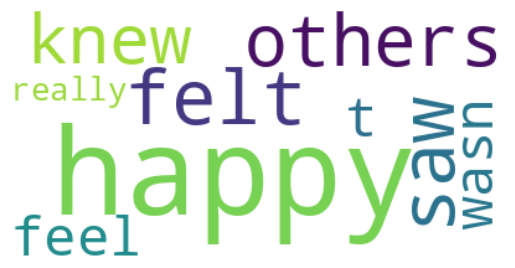

In [11]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = 'I felt happy because I saw the others were happy and because I knew I should feel happy, but I wasn’t really happy.'

# create word cloud
cloud = WordCloud(background_color='white', stopwords=STOPWORDS).generate(text)

# display word cloud
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Feature Engineering

Transforming data into features that can be used in modeling

[WHY] Features passed to an ML model must be numerical

## Bag of Words


### One Hot Encoding
- Method for converting categorical data to numerical data
- New features for each category with indicator (0 or 1) values

| Day  |
|------|
| Mon  |
| Tue  |
| Wed  |

|Mon |Tue |Wed|
|--- |--- |---|
|  1 |  0 | 0 |
|  0 |  1 | 0 |
|  0 |  0 | 1 |

### Bag of Words

A vector representation of words that tells you which words are present and at what frequency

| Text |
|------|
| One apple two apple  |
| red apple green apple  |

| one  | two  | red  | green  | apple  |
|---|---|---|---|---|
| 1  | 1  | 0  | 0  | 2  |
| 0  | 0  | 1  | 1  | 2  |

parameters of **sklearn**'s CountVectorizer() func:
- lowercase
- stop_words
- strip_accents
- token_pattern

### Curse of Dimentionality

We must find a balance between having too few features and too many features

We can: preprocess text(removing stop words, lemmatization, removing punctuation, etc.) will help reduce unneeded dimensionality.

parameters we can tune:
- max_features
- min_df
- max_df
- *ngram_range*

#### n-gram
An N-Gram is a sequence of words as in a sentence. This is useful because it gives us some context to train a deep learning classifier.


A group of n consecutive tokens that can provide word context


| Text |
|------|
| blue not red  |
| red not blue  |

| red  | blue  | not  |
|---|---|---|
| 1  | 1  | 1  |
| 1  | 1  | 1  |

| blue not  | not red  | red not  | not blue  |
|---|---|---|---|
| 1  | 1  | 0  | 0  |
| 0  | 0  | 1  | 1  |

In [ ]:
# e.g. create BoW vector

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# create text
text = ["the cat sat", "the cat in the hat", "the cat sat in the hat"]
text_series = pd.Series(text)

# build vectorizer
vect = CountVectorizer(stop_words='english', ngram_range=(1,2))

# fit vectorizer and create bag of words
X_matrix = vect.fit_transform(text_series)

# create data frame
X_df = pd.DataFrame(X_matrix.toarray(), columns=vect.get_feature_names())
print(X_df.head())

## TF-IDF
term frequency-inverse document frequency

### Term Frequency

Number of times a word appears in a text / number of words - words common within a text will have a high TF value

### Inverse Document Frequency
Number of texts / number of texts the word appears in - words common across many texts will have a low IDF value


### TF-IDF
A vector representation of words that scores their relative importance using term frequency and inverse document frequency

$w_{i,j}=tf_{i,j}*log(\frac{N}{df_{i}})$

| Text |
|------|
| One apple two apple  |
| red apple green apple  |

| one  | two  | red  | green  | apple  |
|---|---|---|---|---|
| 0.5  | 0.5  | 0  | 0  | 0.7  |
| 0  | 0  | 0.5  | 0.5  | 0.7  |

parameters of **sklearn**'s TfidfVectorizer() func:
- lowercase
- stop_words
- strip_accents
- token_pattern

In [ ]:
# e.g. create TfIdf vector

from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# create text example
text = ["the cat sat", "the cat in the hat", "the cat sat in the hat"]
text_series = pd.Series(text)

# build vectorizer
vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2))

# fit vectorizer and create tfidf vector
X_matrix = vect.fit_transform(text_series)

# create data frame
X_df = pd.DataFrame(X_matrix.toarray(), columns=vect.get_feature_names())
print(X_df.head())

## Word Embedding

A neural network model that produces a word vector and can be used to determine the similarity of words and capture complex relationship

| -----|
|------|
| Royalty  |
| Masculinity  |
| Age  |

|King |Queen |Prince| Princess|
|--- |--- |---| ---|
|  0.99 |  0.99 | 0.99 | 0.99 |
|  0.00 |  0.01 | 0.99 | 0.01 |
|  0.75 |  0.75 | 0.25 | 0.25 |

parameters of **sklearn**'s Word2Vec() func:
- size
- min_count
- window
- workers

In [ ]:
# e.g. create Word2Vec vector

from gensim.models import Word2Vec
from nltk.corpus import gutenberg, stopwords

# load text example (comes tokenized)
text = gutenberg.words(fileids='carroll-alice.txt')

# preprocess text
tokens = [word.lower() for word in text if word.isalpha()]

# create model
model = Word2Vec([tokens], min_count=3, window=3)

# compute pairwise similarity
print(model.wv.similarity('alice','her'))

# find most similar words
print(model.wv.most_similar('read'))

# Classification

## Sentiment analysis
Process of categorizing opinions found within a text

Two approaches:
- Rule Based
- Machine Learning

## Machine Learning

- **supervised learning**
- unsupervised learning
- semi-supervised learning

### Supervised Learning
Building a predictive model based on data with known outcomes

Key steps of a supervised learning model:
- Test/Train/Split data set
- Fit a model
- Evaluate model accuracy

### Classification
Task of predicting a class of given inputs

Types of classification problems:
- Binary classification
- Multi-class classification

### Logistic Regression

Model that uses a logistic function to determine a threshold for classifying data
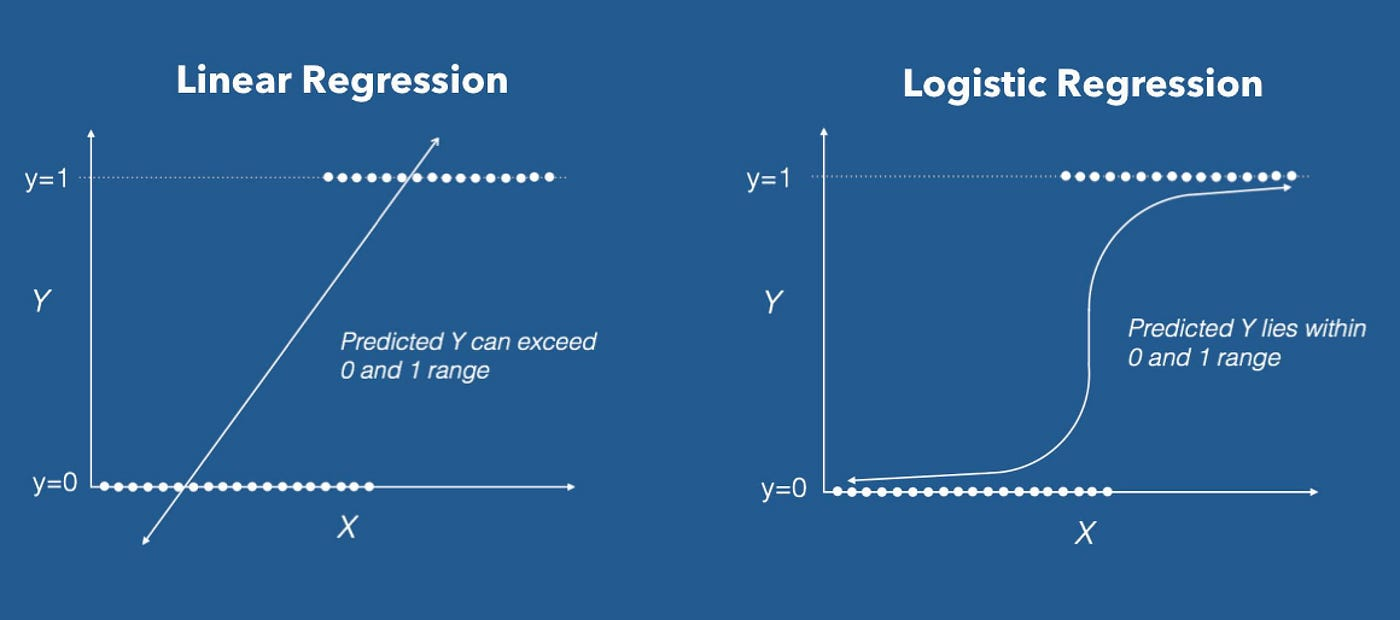

### Naive Bayes
A probabilistic classification model based on Bayes Theorem

$P(y|X)=\frac{P(X|y)P(y)}{P(X)}$